#Task 1

In [1]:
%cd C:\Users\Michel\DataspellProjects\dsProject\docs_classif

C:\Users\Michel\DataspellProjects\dsProject\docs_classif


In [2]:
import csv
import re
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Подключимся к апи телерамма и создадим фрейм из сообщений

In [ ]:
from telethon.sync import TelegramClient
api_id   =  18934802 
api_hash = 'd11426c2e7ce3b4252f60109db145038'
username = 'taskdocs'
# async def func():
i = 0
n_of_msgs = 4000
with open("data.csv", mode="w", encoding='utf-8') as w_file:
    file_writer = csv.writer(w_file, delimiter = ",", lineterminator="\n")
    file_writer.writerow(['date', 'message'])
    async with TelegramClient(username, api_id, api_hash) as client:
        async for message in client.iter_messages('https://t.me/Sputnik_results'):
            if i < n_of_msgs:
                file_writer.writerow([message.date, message.text])
                i += 1
            else: 
                break

In [89]:
df = pd.read_csv('data.csv')
df.head()

,date,message
0,2021-12-15 14:28:29+00:00,"Ревакцинация Спутник V, 1 компонент 9.11.21, ..."
1,2021-12-15 14:15:00+00:00,🔘 **Приглашаем принять участие в КИ** 🐰\r\n\r\...
2,2021-12-15 13:00:04+00:00,**Народные отчеты о вакцинации\r\n\r\n**⚠️ **Т...
3,2021-12-15 11:37:04+00:00,"Ж 33, хронических болезней нет.переболела кови..."
4,2021-12-15 11:30:42+00:00,"Ж 38, беременность 22нед. \r\nV1 13.12.21 в 16..."


In [90]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

Отрисуем на графике количество сообщений в зависимости от дня 

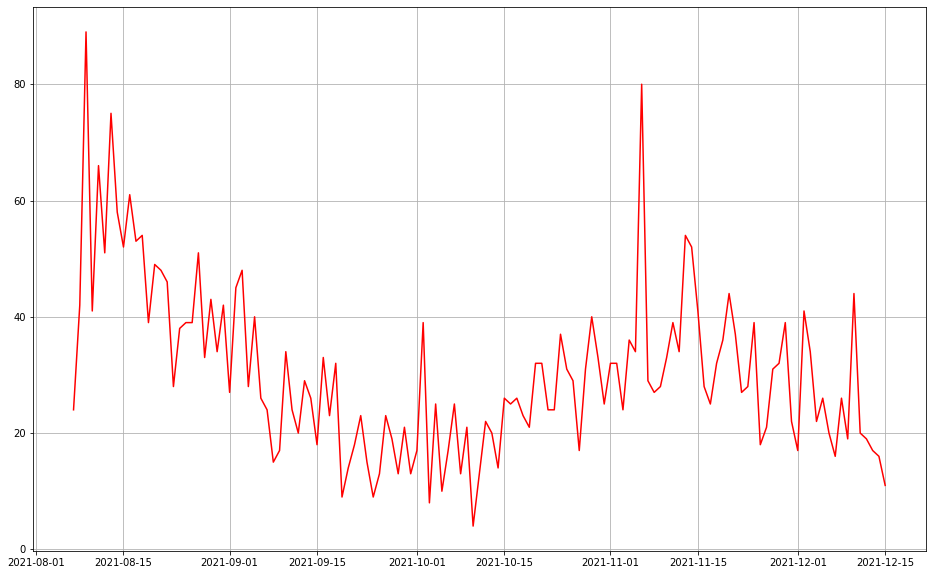

In [91]:
count = df.groupby(df['date'].dt.date).size()
plt.figure(figsize=(16,10))
plt.plot(count,color='red')
plt.grid()
plt.show()

Как можно заметить, на графике можно явно отследить тренд в определенный период времени

#Task 2

Сделаем новый df, найдем пол, возраст и вакцину, которой человек делал прививку

In [92]:
new_df = pd.DataFrame({'Sex':[],'Age':[],'vaccine':[]})

In [93]:
idx = 0
for text in df['message']:
  text = str(text).lower()
  result=re.search(r'(м|ж)\s?\d\d',str(text))
  if result!=None:
    result2 = re.search(r'(спутник|эпивак|ковивак)',str(text))
    result = result.group(0)
    result = result.split()
    result = ''.join(result)
    if result2!=None:
      result2 = result2.group(0)
      if result2 == 'спутник':
        new_df.loc[idx] = [result[0],result[1:],'спутник']
      elif result2 == 'эпивак':
        new_df.loc[idx] = [result[0],result[1:],'эпивак']
      elif result2 == 'ковивак':
        new_df.loc[idx] = [result[0],result[1:],'ковивак']
      idx+=1


In [94]:
new_df.head()

,Sex,Age,vaccine
0,ж,33,спутник
1,ж,28,спутник
2,ж,29,спутник
3,ж,77,спутник
4,ж,49,спутник


Отрисуем несколько графиков, характеризующих долю вакцинировавшихся конкретной из 3х отечественных вакцин

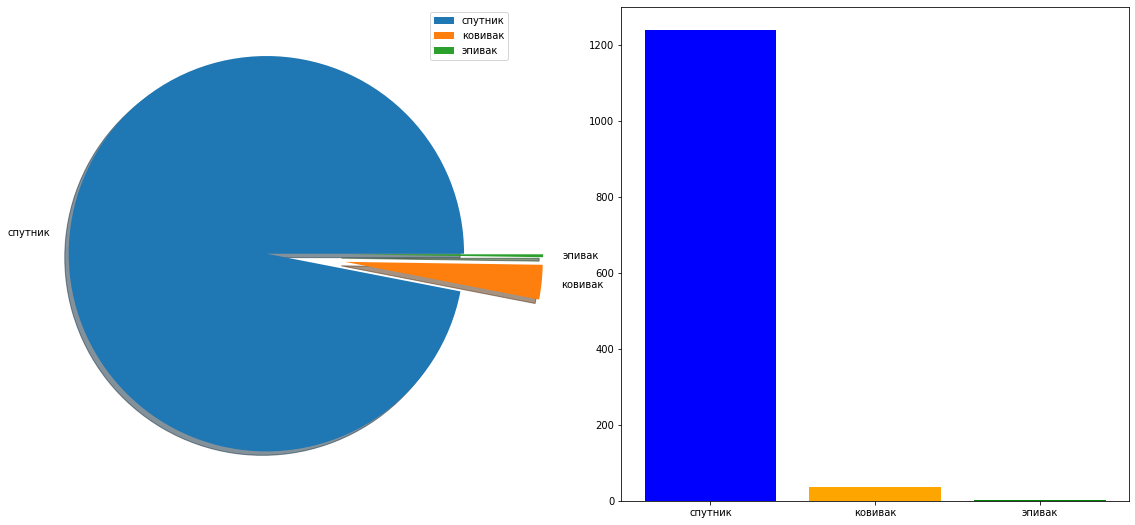

In [106]:
df = new_df['vaccine'].value_counts().reset_index()
df.columns = ['vaccine_idx', 'count']
labels = df['vaccine_idx']
myexplode = [0, 0.4, 0.4]
fig = plt.figure(figsize=(20,20))
ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)

ax_1.pie(df['count'], labels=labels,explode=myexplode,shadow=True) 
ax_2.bar(labels,df['count'],color=['blue','orange','green']) 
ax_1.legend(labels)
plt.show()

Конечно, о точной статистике привившихся по результатам такого исследования судить плохо, но можно сказать, что вакцина 'Спутник' популярнее остальных